### Importing Libs

In [30]:
from sdv.datasets.demo import download_demo
from sdv.lite import SingleTablePreset
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.single_table import CTGANSynthesizer
from sdv.sequential import PARSynthesizer
from sdv.sampling import Condition
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot

### Get Demo data

In [2]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

### QuickStart

In [3]:
synthesizer = SingleTablePreset(metadata, name='FAST_ML')
synthesizer.fit(data=real_data)

synthetic_data = synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 46.89it/s]



Overall Quality Score: 89.12%

Properties:
Column Shapes: 90.27%
Column Pair Trends: 87.97%


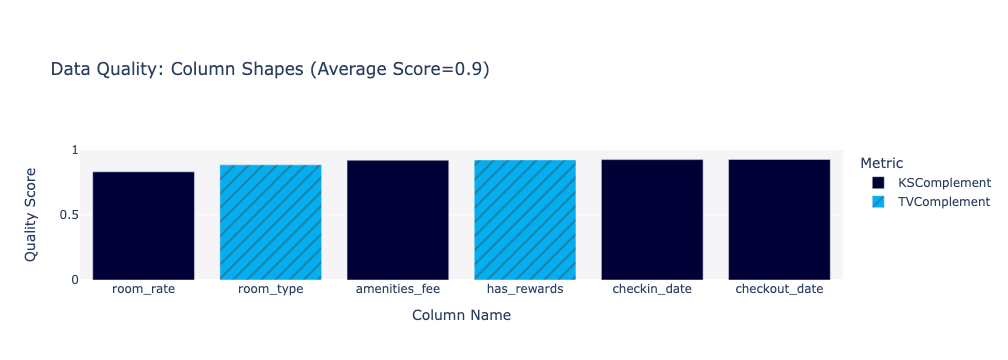

In [4]:
quality_report.get_visualization('Column Shapes')

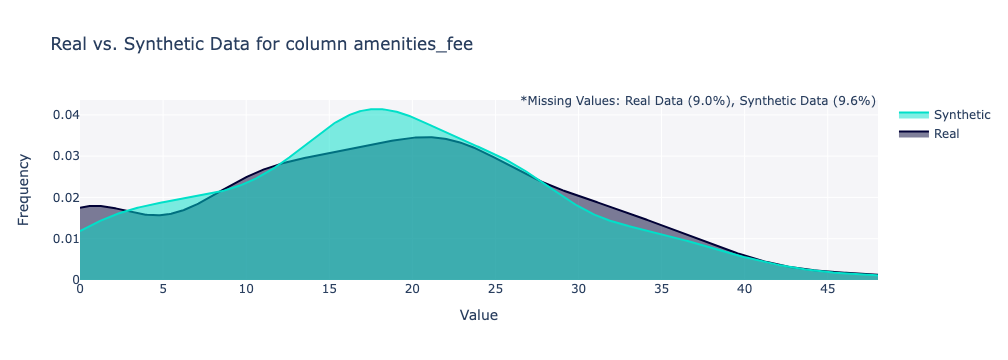

In [5]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='amenities_fee',
    metadata=metadata
)
    
fig.show()

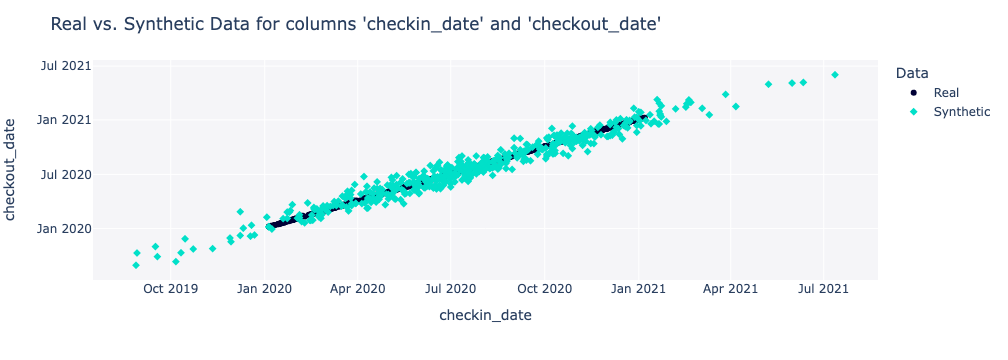

In [6]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['checkin_date', 'checkout_date'],
    metadata=metadata
)
    
fig.show()

In [7]:
synthesizer.save('base_synthesizer.pkl')

synthesizer = SingleTablePreset.load('base_synthesizer.pkl')

### GaussianCopula

In [8]:
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

synthetic_data = synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 45.79it/s]



Overall Quality Score: 87.83%

Properties:
Column Shapes: 87.28%
Column Pair Trends: 88.38%


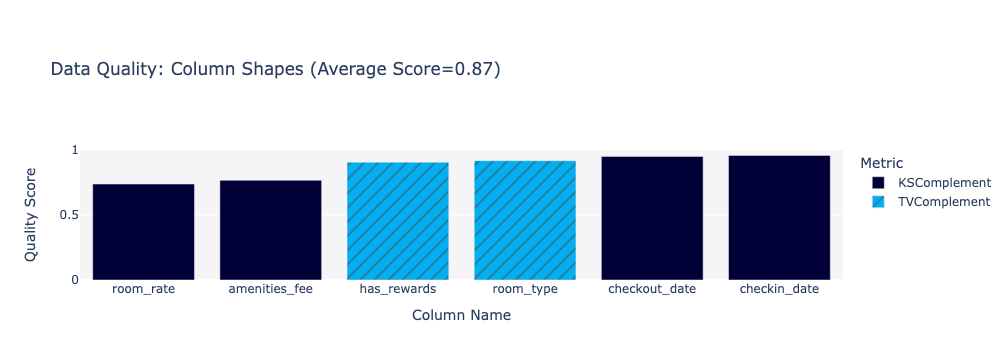

In [9]:
quality_report.get_visualization('Column Shapes')

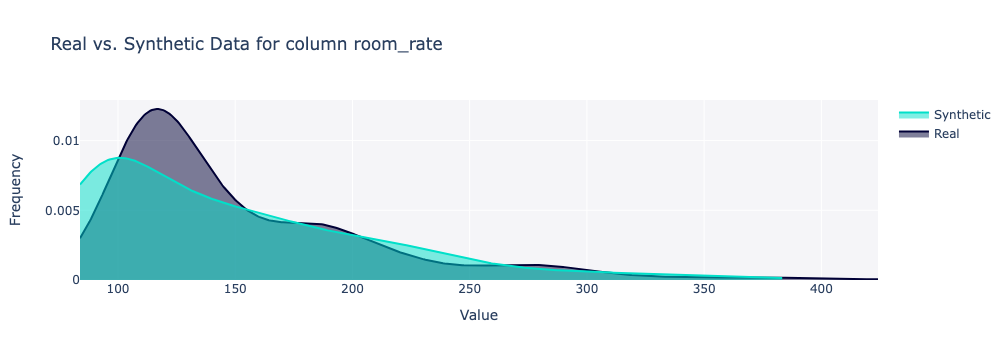

In [10]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_rate',
    metadata=metadata
)
    
fig.show()

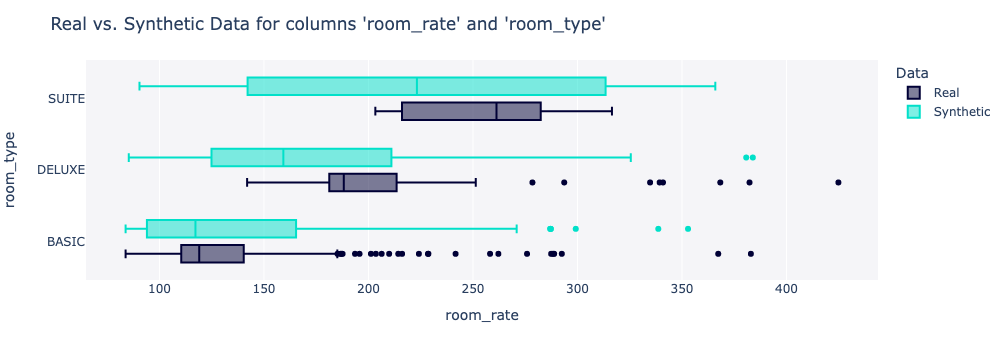

In [11]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata
)
    
fig.show()

In [12]:
synthesizer.save('gaussian_synthesizer.pkl')

synthesizer = GaussianCopulaSynthesizer.load('gaussian_synthesizer.pkl')

In [13]:
custom_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    default_distribution='truncnorm',
    numerical_distributions={
        'checkin_date': 'uniform',
        'checkout_date': 'uniform',
        'room_rate': 'gaussian_kde'
    }
)

custom_synthesizer.fit(real_data)

learned_distributions = custom_synthesizer.get_learned_distributions()

synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)


Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 42.27it/s]



Overall Quality Score: 89.65%

Properties:
Column Shapes: 89.85%
Column Pair Trends: 89.45%


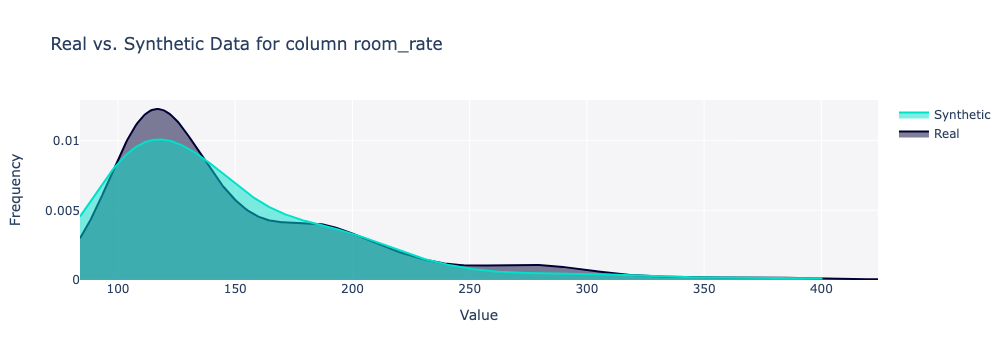

In [14]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data_customized,
    column_name='room_rate',
    metadata=metadata
)
    
fig.show()

In [15]:
suite_guests_with_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': True}
)

suite_guests_without_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': False}
)

In [16]:
simulated_synthetic_data = custom_synthesizer.sample_from_conditions(conditions=[
  suite_guests_with_rewards,
  suite_guests_without_rewards
])

Sampling conditions: 100%|███████████████████| 500/500 [00:00<00:00, 980.28it/s]


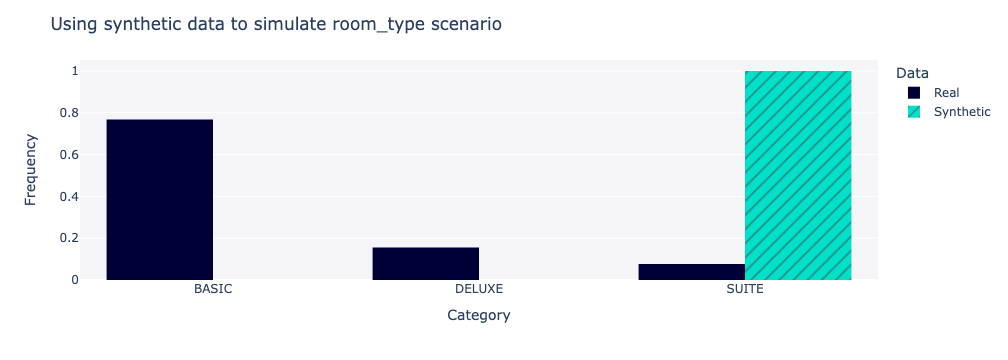

In [17]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=simulated_synthetic_data,
    column_name='room_type',
    metadata=metadata
)

fig.update_layout(
    title='Using synthetic data to simulate room_type scenario'
)
    
fig.show()

### CTGAN

In [18]:
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(real_data)

synthetic_data = synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 38.03it/s]



Overall Quality Score: 84.18%

Properties:
Column Shapes: 86.18%
Column Pair Trends: 82.18%


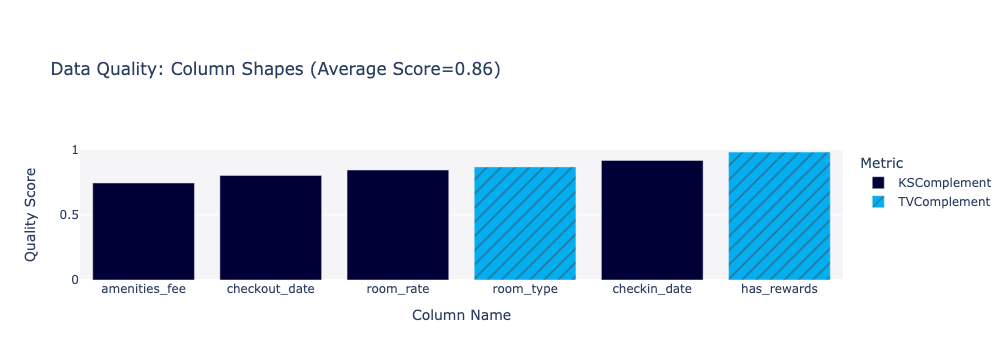

In [19]:
quality_report.get_visualization('Column Shapes')

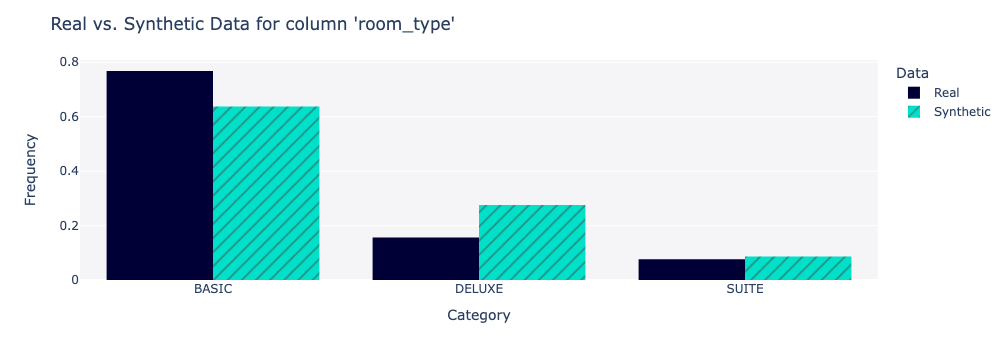

In [21]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_type',
    metadata=metadata
)
    
fig.show()

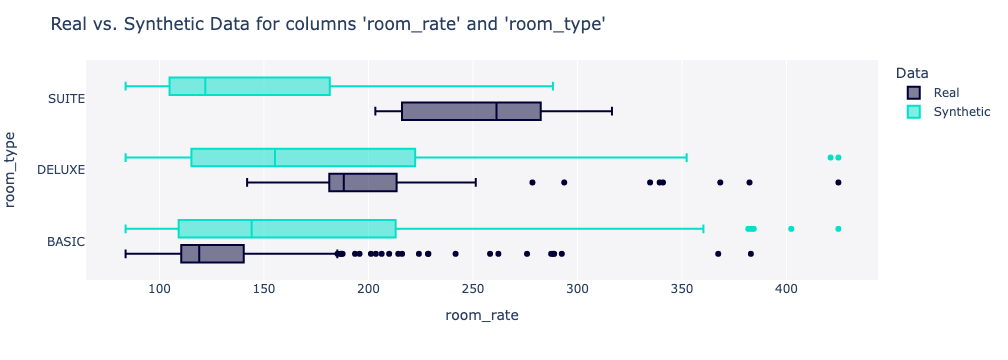

In [22]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata
)
    
fig.show()

In [23]:
synthesizer.save('ctgan_synthesizer.pkl')

synthesizer = CTGANSynthesizer.load('ctgan_synthesizer.pkl')

In [26]:
custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=1000)
custom_synthesizer.fit(real_data)

synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 35.95it/s]



Overall Quality Score: 87.24%

Properties:
Column Shapes: 89.85%
Column Pair Trends: 84.64%


### PAR

In [28]:
real_data, metadata = download_demo(
    modality='sequential',
    dataset_name='nasdaq100_2019'
)

In [31]:
synthesizer = PARSynthesizer(
    metadata,
    context_columns=['Sector', 'Industry'])

synthesizer.fit(real_data)

synthetic_data = synthesizer.sample(num_sequences=10)

synthesizer.save('par_synthesizer.pkl')

synthesizer = PARSynthesizer.load('par_synthesizer.pkl')


In [32]:
custom_synthesizer = PARSynthesizer(
    metadata,
    epochs=250,
    context_columns=['Sector', 'Industry'],
    verbose=True)

custom_synthesizer.fit(real_data)

Epoch 250 | Loss -2.6501166820526123: 100%|███| 250/250 [03:44<00:00,  1.11it/s]
